# EVALUATION PROJECT 5 - TEMPERATURE FORECAST PROJECT USING ML
# NAME - SUBHAM
# BATCH - DS2401

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)

In [114]:
df= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [5]:
df.shape
# there are 7752 rows and 25 columns in the dataset

(7752, 25)

In [6]:
df.dtypes
# datatype for date is only object datatype and other columns have float datatype

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [115]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [116]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [22]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [58]:
# finding mean for columns having float datatype and mode for columns having object datatype 
for i in df.columns:
    if df[i].dtypes=='datetime64[ns]':
        print(df[i].mode())
        print('\n')
    else :
        df[i].dtypes=='float64'
        print(df[i].mean())
        print('\n')

13.0


0     2013-06-30
1     2013-07-01
2     2013-07-02
3     2013-07-03
4     2013-07-04
         ...    
305   2017-08-26
306   2017-08-27
307   2017-08-28
308   2017-08-29
309   2017-08-30
Name: Date, Length: 310, dtype: datetime64[ns]


29.7682114032804


23.225058578495183


56.759372150692975


88.37480388719031


29.6134465428136


23.5125887762798


7.097874569625374


62.5050189093405


0.36877358559828055


0.3560804372839651


0.3184039558214146


0.2991913889145369


0.5919945266984499


0.4850025590969128


0.2781996392747167


0.26940734997772564


37.54472151702786


126.9913971878225


61.86797226522187


1.257048465505676


5341.502802661377


30.274886731391586


22.93222006472492




In [117]:
# filling NaN values with mode if datatype is object and mean if datatype is mean
df['Present_Tmax'].fillna(29.7682114032804,inplace=True)
df['Present_Tmin'].fillna(23.225058578495183,inplace=True)
df['LDAPS_RHmin'].fillna(56.759372150692975,inplace=True)
df['LDAPS_RHmax'].fillna(88.37480388719031,inplace=True)
df['LDAPS_Tmax_lapse'].fillna(29.6134465428136,inplace=True)
df['LDAPS_Tmin_lapse'].fillna(23.5125887762798,inplace=True)
df['LDAPS_WS'].fillna(7.097874569625374,inplace=True)
df['LDAPS_LH'].fillna(62.5050189093405,inplace=True)
df['LDAPS_CC1'].fillna(0.36877358559828055,inplace=True)
df['LDAPS_CC2'].fillna(0.3560804372839651,inplace=True)
df['LDAPS_CC3'].fillna(0.3184039558214146,inplace=True)
df['LDAPS_CC4'].fillna(0.2991913889145369,inplace=True)
df['LDAPS_PPT1'].fillna(0.5919945266984499,inplace=True)
df['LDAPS_PPT2'].fillna(0.4850025590969128,inplace=True)
df['LDAPS_PPT3'].fillna(0.2781996392747167,inplace=True)
df['LDAPS_PPT4'].fillna(0.26940734997772564,inplace=True)


In [118]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [119]:
df.dropna(axis=0,inplace=True)
# removing remaining NaN values as next_Tmax and Next_Tmin are labels so their NaN values doesn't tell anything and causes 
# obstruction in understanding the pattern for model building so it's better to remove these NaN values 
# and station and Date column have only 2 NaN values so it will also be alright to remove these NaN values

In [120]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7723 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7723 non-null   float64       
 1   Date              7723 non-null   datetime64[ns]
 2   Present_Tmax      7723 non-null   float64       
 3   Present_Tmin      7723 non-null   float64       
 4   LDAPS_RHmin       7723 non-null   float64       
 5   LDAPS_RHmax       7723 non-null   float64       
 6   LDAPS_Tmax_lapse  7723 non-null   float64       
 7   LDAPS_Tmin_lapse  7723 non-null   float64       
 8   LDAPS_WS          7723 non-null   float64       
 9   LDAPS_LH          7723 non-null   float64       
 10  LDAPS_CC1         7723 non-null   float64       
 11  LDAPS_CC2         7723 non-null   float64       
 12  LDAPS_CC3         7723 non-null   float64       
 13  LDAPS_CC4         7723 non-null   float64       
 14  LDAPS_PPT1        7723 non-nu

In [29]:
# there are now 7723 rows and 25 columns, 29 rows are deleted
7752-7723
# datatype is same as before we can see here and null values are not present or removed

29

In [31]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
# we can check all unique values and their value counts with this
# length represent total no. of unique values
# for e.g :- Present_Tmax contains 168 unique values and unique value 31.4 occurs 112 times

station
1.0     310
10.0    310
23.0    310
21.0    310
18.0    310
17.0    310
14.0    310
2.0     310
13.0    310
9.0     310
4.0     310
3.0     310
25.0    310
12.0    309
16.0    309
19.0    309
20.0    309
24.0    309
11.0    308
15.0    308
22.0    308
8.0     307
7.0     306
6.0     306
5.0     305
Name: count, dtype: int64


Date
2013-06-30    25
2015-07-21    25
2016-07-18    25
2016-07-17    25
2016-07-16    25
              ..
2017-07-09    24
2013-08-11    24
2013-08-03    24
2015-07-31    24
2017-08-23    23
Name: count, Length: 310, dtype: int64


Present_Tmax
31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: count, Length: 168, dtype: int64


Present_Tmin
24.0    161
23.8    153
23.1    143
23.5    143
23.3    140
       ... 
29.7      1
29.6      1
14.3      1
29.9      1
15.0      1
Name: count, Length: 156, dtype: int64


LDAPS_RHmin
56.759372    75
71.658089     2
77.030350     2

# DESCRIPTION OF DATASET

In [33]:
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7723.000000,7723,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000
mean,13.008157,2015-07-29 22:17:49.325391616,29.769804,23.225314,56.740950,88.371500,29.616623,23.512221,7.095384,62.459258,0.368455,0.355766,0.318091,0.299044,0.588771,0.481631,0.275152,0.267353,37.544753,126.991373,61.913798,1.258368,5342.112868,30.275437,22.932837
min,1.000000,2013-06-30 00:00:00,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,2014-07-15 00:00:00,27.800000,21.700000,46.045780,84.291611,27.696327,22.114527,5.686500,37.460390,0.148259,0.142482,0.103248,0.082738,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,2015-07-30 00:00:00,29.900000,23.400000,55.266701,89.699196,29.664030,23.733589,6.564141,57.299645,0.319678,0.315159,0.265058,0.232663,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5437.534180,30.500000,23.100000
75%,19.000000,2016-08-15 00:00:00,32.000000,24.900000,66.991833,93.702629,31.684914,25.134434,7.996720,83.884903,0.571472,0.554287,0.493479,0.497073,0.067101,0.024025,0.009648,0.000696,37.577600,127.042000,59.832400,1.767800,5728.624512,32.600000,24.600000
max,25.000000,2017-08-30 00:00:00,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000
std,7.214034,NaN,2.956157,2.400841,14.571702,7.155898,2.927713,2.330885,2.165080,33.505514,0.260963,0.256571,0.248771,0.252855,1.918605,1.736231,1.138910,1.185557,0.050370,0.079318,54.308844,1.370719,429.072274,3.123441,2.483181


In [121]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='datetime64[ns]':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [122]:
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000
mean,13.008157,154.314256,29.769804,23.225314,56.740950,88.371500,29.616623,23.512221,7.095384,62.459258,0.368455,0.355766,0.318091,0.299044,0.588771,0.481631,0.275152,0.267353,37.544753,126.991373,61.913798,1.258368,5342.112868,30.275437,22.932837
std,7.214034,89.451735,2.956157,2.400841,14.571702,7.155898,2.927713,2.330885,2.165080,33.505514,0.260963,0.256571,0.248771,0.252855,1.918605,1.736231,1.138910,1.185557,0.050370,0.079318,54.308844,1.370719,429.072274,3.123441,2.483181
min,1.000000,0.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,77.000000,27.800000,21.700000,46.045780,84.291611,27.696327,22.114527,5.686500,37.460390,0.148259,0.142482,0.103248,0.082738,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,154.000000,29.900000,23.400000,55.266701,89.699196,29.664030,23.733589,6.564141,57.299645,0.319678,0.315159,0.265058,0.232663,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5437.534180,30.500000,23.100000
75%,19.000000,232.000000,32.000000,24.900000,66.991833,93.702629,31.684914,25.134434,7.996720,83.884903,0.571472,0.554287,0.493479,0.497073,0.067101,0.024025,0.009648,0.000696,37.577600,127.042000,59.832400,1.767800,5728.624512,32.600000,24.600000
max,25.000000,309.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


In [ ]:
# 1) all columns have 7723 count meaning there are no null values
# 2) skewness is present in the dataset. mean > median -> right skew and median > mean -> left skew
#    right skew : LDAPS_RHmin , LDAPS_WS , LDAPS_LH , LDAPS_CC1 , LDAPS_CC2 , LDAPS_CC3 , LDAPS_CC4 , LDAPS_PPT1 , LDAPS_PPT2
#                 LDAPS_PPT3 , LDAPS_PPT4 , DEM , Slope
#    left skew :  LDAPS_RHmax , LDAPS_Tmin_lapse , Solar radiation
# 3) outliers are present if there is jump in the values of 75% and 100% 
#    outliers are present in :- Present_Tmax , Present_Tmin , LDAPS_RHmin , LDAPS_RHmax , LDAPS_Tmax_lapse , LDAPS_WS(highly)
#                               LDAPS_LH(highly) , LDAPS_CC1 , LDAPS_CC2 , LDAPS_CC3 , LDAPS_CC4 , LDAPS_PPT1(highly) ,
#                               LDAPS_PPT2(highly) , LDAPS_PPT3(highly) , LDAPS_PPT4(highly) , DEM(highly) , slope(highly)
#                               Next_Tmax , Next_Tmin

# CHECKING SKEWNESS

In [39]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [40]:
a=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1']
b=['LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
c=['Date']

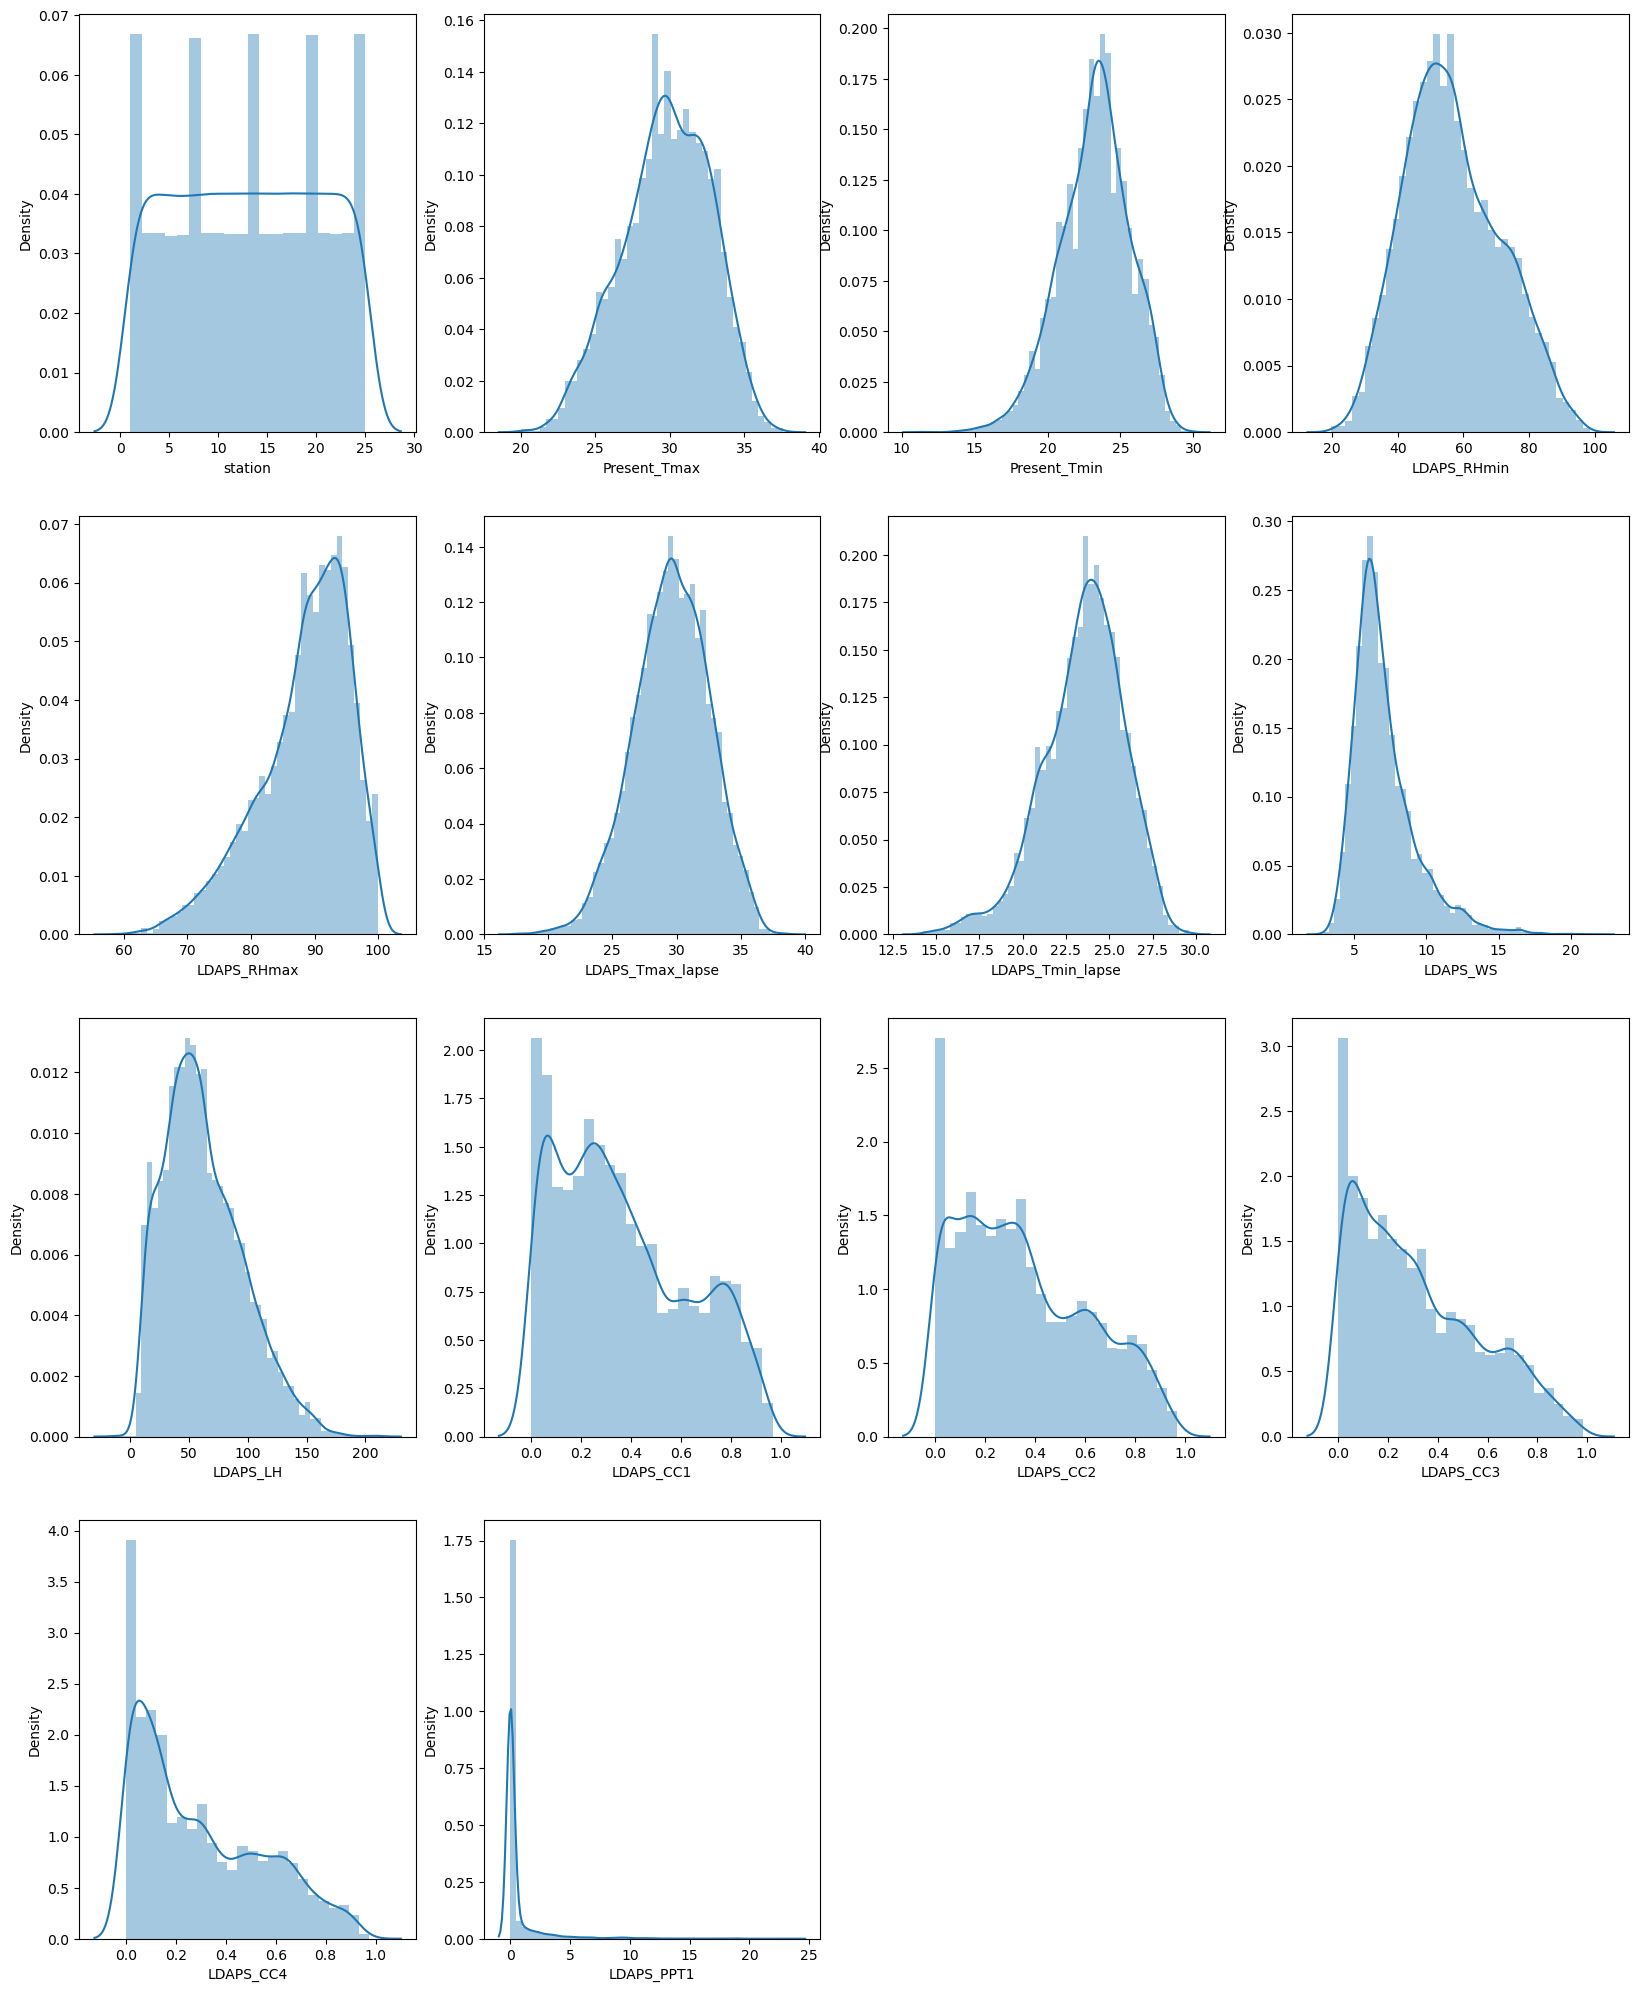

In [41]:
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in a:
    if p<=15:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

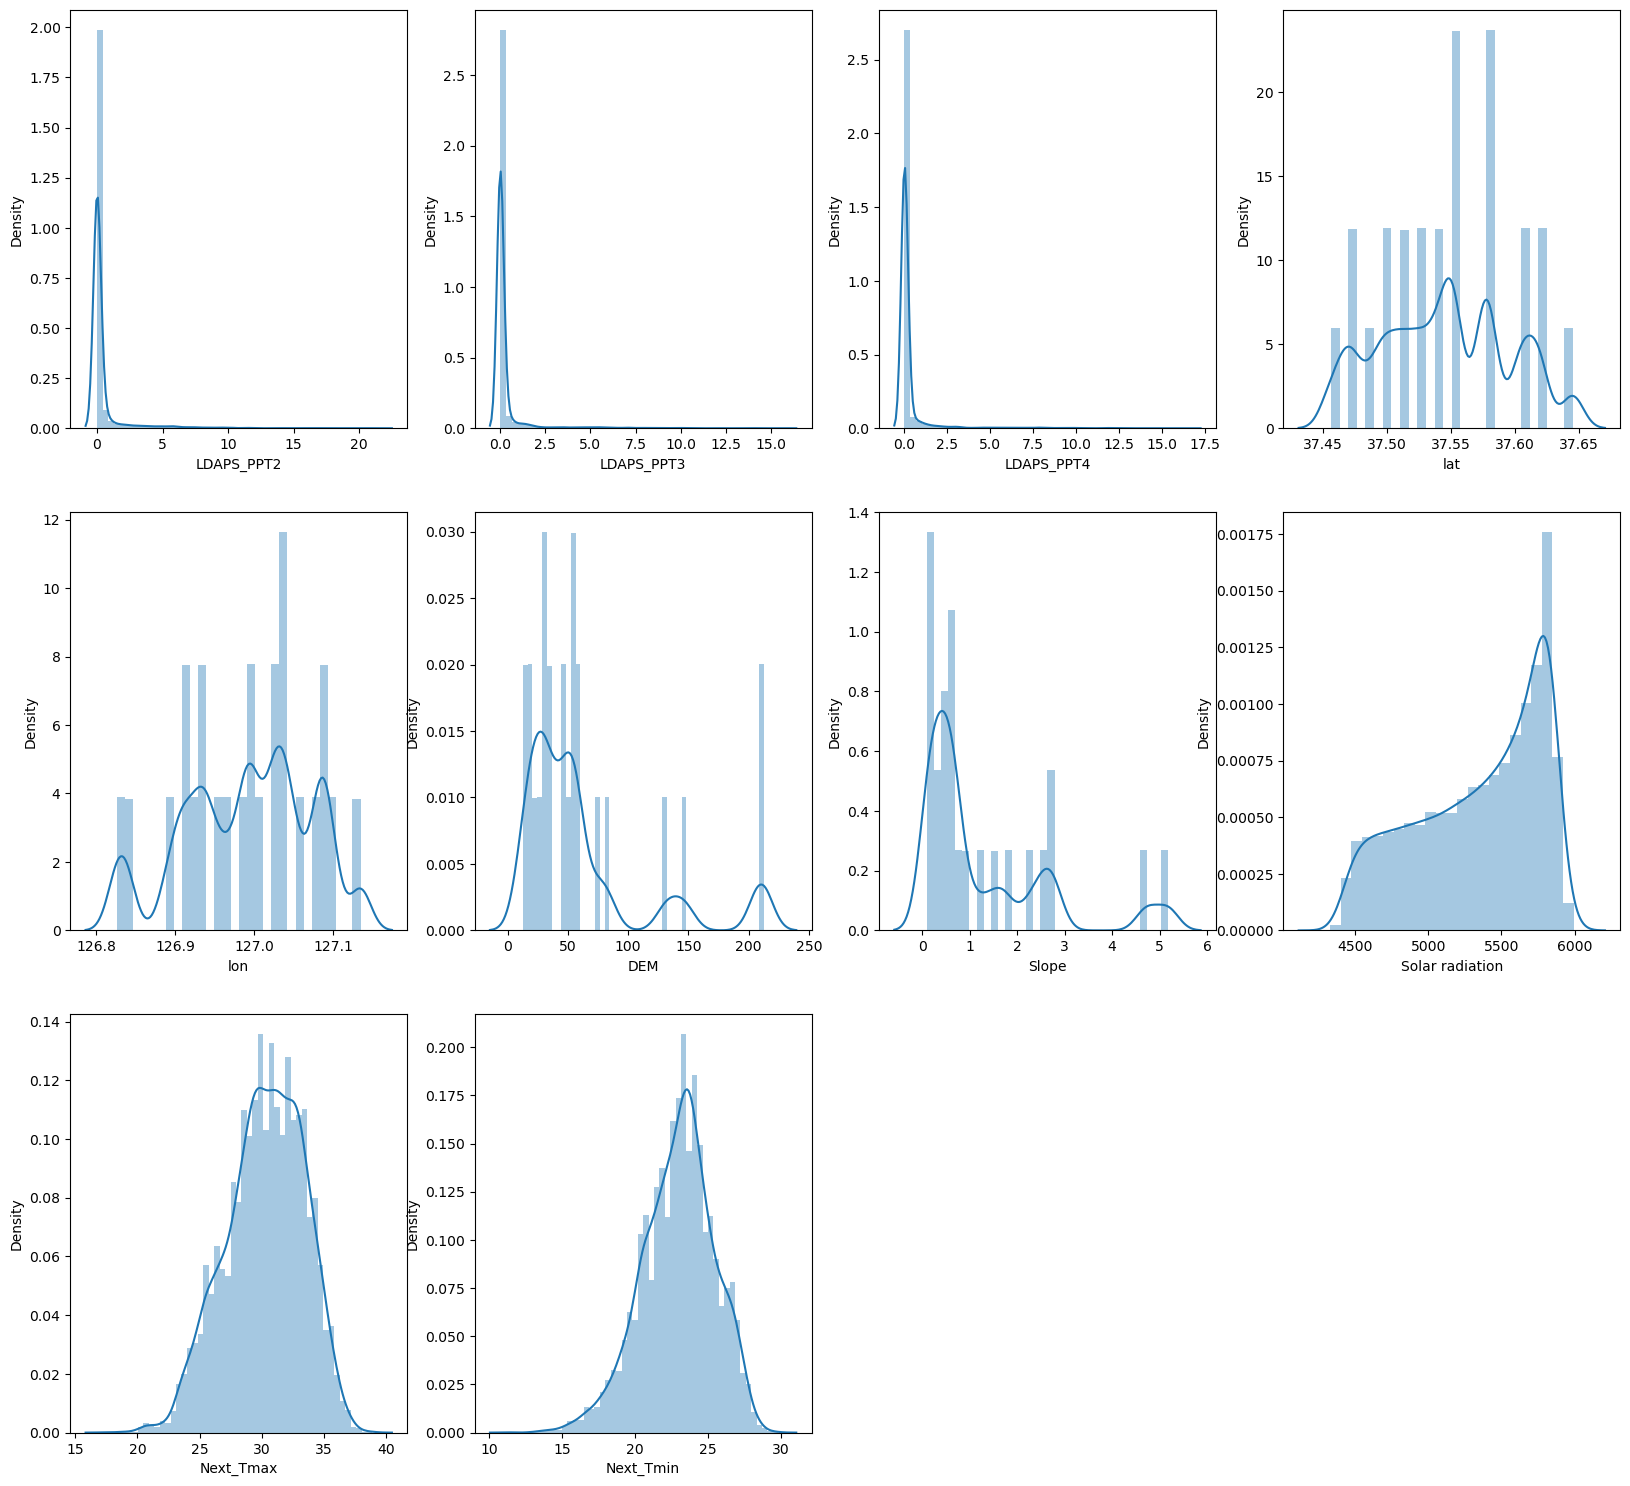

In [42]:
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in b:
    if p<=15:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

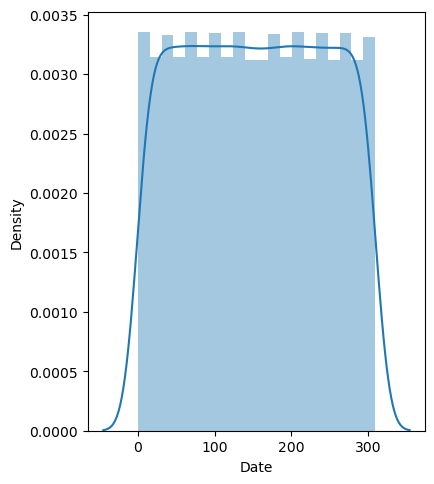

In [43]:
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in c:
    if p<=15:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

In [ ]:
# we can see from the distplots that skewness is present in some of them 
# right skewed data are :-  'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4' , 'LDAPS_PPT1' ,
#                           'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4' , 'DEM', 'Slope'
# left skewed data are :-  'Present_Tmax', 'Present_Tmin' , 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse' , 'Solar radiation', 'Next_Tmax', 
#                          'Next_Tmin'

In [123]:
#we can check numerical value of skewness too
# acceptable range of skewness is +0.5 to -0.5
df.skew()
# Positive value means the distribution is skewed to the right.
# Negative value means the distribution is skewed to the left.
# 0 means perfect normal distribution. The bell shaped curve.

station            -0.002773
Date                0.001682
Present_Tmax       -0.263625
Present_Tmin       -0.356544
LDAPS_RHmin         0.302969
LDAPS_RHmax        -0.849762
LDAPS_Tmax_lapse   -0.223709
LDAPS_Tmin_lapse   -0.577906
LDAPS_WS            1.558527
LDAPS_LH            0.666802
LDAPS_CC1           0.460284
LDAPS_CC2           0.474829
LDAPS_CC3           0.641569
LDAPS_CC4           0.665622
LDAPS_PPT1          5.329705
LDAPS_PPT2          5.720478
LDAPS_PPT3          6.379430
LDAPS_PPT4          6.751450
lat                 0.086467
lon                -0.286647
DEM                 1.721745
Slope               1.560876
Solar radiation    -0.513584
Next_Tmax          -0.335372
Next_Tmin          -0.396184
dtype: float64

In [124]:
#removing skewness using cuberoot method
# these are the columns which have values more or less than +0.5 and -0.5 resp.
# df['LDAPS_RHmax']=np.cbrt(df['LDAPS_RHmax']) this column skewness is increasing so it's better to not use cuberoot for this 
df['LDAPS_WS']=np.cbrt(df['LDAPS_WS'])
df['LDAPS_LH']=np.cbrt(df['LDAPS_LH'])
df['LDAPS_CC3']=np.cbrt(df['LDAPS_CC3'])
df['LDAPS_CC4']=np.cbrt(df['LDAPS_CC4'])
df['LDAPS_PPT1']=np.cbrt(df['LDAPS_PPT1'])
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT2'])
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])
df['DEM']=np.cbrt(df['DEM'])
df['Slope']=np.cbrt(df['Slope'])

In [125]:
df.skew()

station            -0.002773
Date                0.001682
Present_Tmax       -0.263625
Present_Tmin       -0.356544
LDAPS_RHmin         0.302969
LDAPS_RHmax        -0.849762
LDAPS_Tmax_lapse   -0.223709
LDAPS_Tmin_lapse   -0.577906
LDAPS_WS            0.878441
LDAPS_LH           -0.353424
LDAPS_CC1           0.460284
LDAPS_CC2           0.474829
LDAPS_CC3          -0.571239
LDAPS_CC4          -0.467847
LDAPS_PPT1          1.920108
LDAPS_PPT2          2.220652
LDAPS_PPT3          2.518546
LDAPS_PPT4          2.781781
lat                 0.086467
lon                -0.286647
DEM                 0.919616
Slope               0.613225
Solar radiation    -0.513584
Next_Tmax          -0.335372
Next_Tmin          -0.396184
dtype: float64

In [126]:
df['LDAPS_WS']=np.cbrt(df['LDAPS_WS'])
df['LDAPS_PPT1']=np.cbrt(df['LDAPS_PPT1'])
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT2'])
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])
df['DEM']=np.cbrt(df['DEM'])
df['Slope']=np.cbrt(df['Slope'])

In [127]:
df.skew()

station            -0.002773
Date                0.001682
Present_Tmax       -0.263625
Present_Tmin       -0.356544
LDAPS_RHmin         0.302969
LDAPS_RHmax        -0.849762
LDAPS_Tmax_lapse   -0.223709
LDAPS_Tmin_lapse   -0.577906
LDAPS_WS            0.674674
LDAPS_LH           -0.353424
LDAPS_CC1           0.460284
LDAPS_CC2           0.474829
LDAPS_CC3          -0.571239
LDAPS_CC4          -0.467847
LDAPS_PPT1          0.833966
LDAPS_PPT2          1.019687
LDAPS_PPT3          1.101645
LDAPS_PPT4          1.411576
lat                 0.086467
lon                -0.286647
DEM                 0.584806
Slope               0.250380
Solar radiation    -0.513584
Next_Tmax          -0.335372
Next_Tmin          -0.396184
dtype: float64

In [128]:
df['LDAPS_WS']=np.cbrt(df['LDAPS_WS'])
df['LDAPS_PPT1']=np.cbrt(df['LDAPS_PPT1'])
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT2'])
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])

In [129]:
df.skew()

station            -0.002773
Date                0.001682
Present_Tmax       -0.263625
Present_Tmin       -0.356544
LDAPS_RHmin         0.302969
LDAPS_RHmax        -0.849762
LDAPS_Tmax_lapse   -0.223709
LDAPS_Tmin_lapse   -0.577906
LDAPS_WS            0.608506
LDAPS_LH           -0.353424
LDAPS_CC1           0.460284
LDAPS_CC2           0.474829
LDAPS_CC3          -0.571239
LDAPS_CC4          -0.467847
LDAPS_PPT1          0.563139
LDAPS_PPT2          0.743292
LDAPS_PPT3          0.828682
LDAPS_PPT4          1.145361
lat                 0.086467
lon                -0.286647
DEM                 0.584806
Slope               0.250380
Solar radiation    -0.513584
Next_Tmax          -0.335372
Next_Tmin          -0.396184
dtype: float64

In [130]:
df['LDAPS_WS']=np.cbrt(df['LDAPS_WS'])
df['LDAPS_PPT1']=np.cbrt(df['LDAPS_PPT1'])
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT2'])
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])

In [131]:
df.skew()

station            -0.002773
Date                0.001682
Present_Tmax       -0.263625
Present_Tmin       -0.356544
LDAPS_RHmin         0.302969
LDAPS_RHmax        -0.849762
LDAPS_Tmax_lapse   -0.223709
LDAPS_Tmin_lapse   -0.577906
LDAPS_WS            0.586619
LDAPS_LH           -0.353424
LDAPS_CC1           0.460284
LDAPS_CC2           0.474829
LDAPS_CC3          -0.571239
LDAPS_CC4          -0.467847
LDAPS_PPT1          0.523629
LDAPS_PPT2          0.704092
LDAPS_PPT3          0.792848
LDAPS_PPT4          1.109957
lat                 0.086467
lon                -0.286647
DEM                 0.584806
Slope               0.250380
Solar radiation    -0.513584
Next_Tmax          -0.335372
Next_Tmin          -0.396184
dtype: float64

In [ ]:
# these are the best reduced skewness that can be achieved through cuberoot method

# CHECKING FOR OUTLIERS

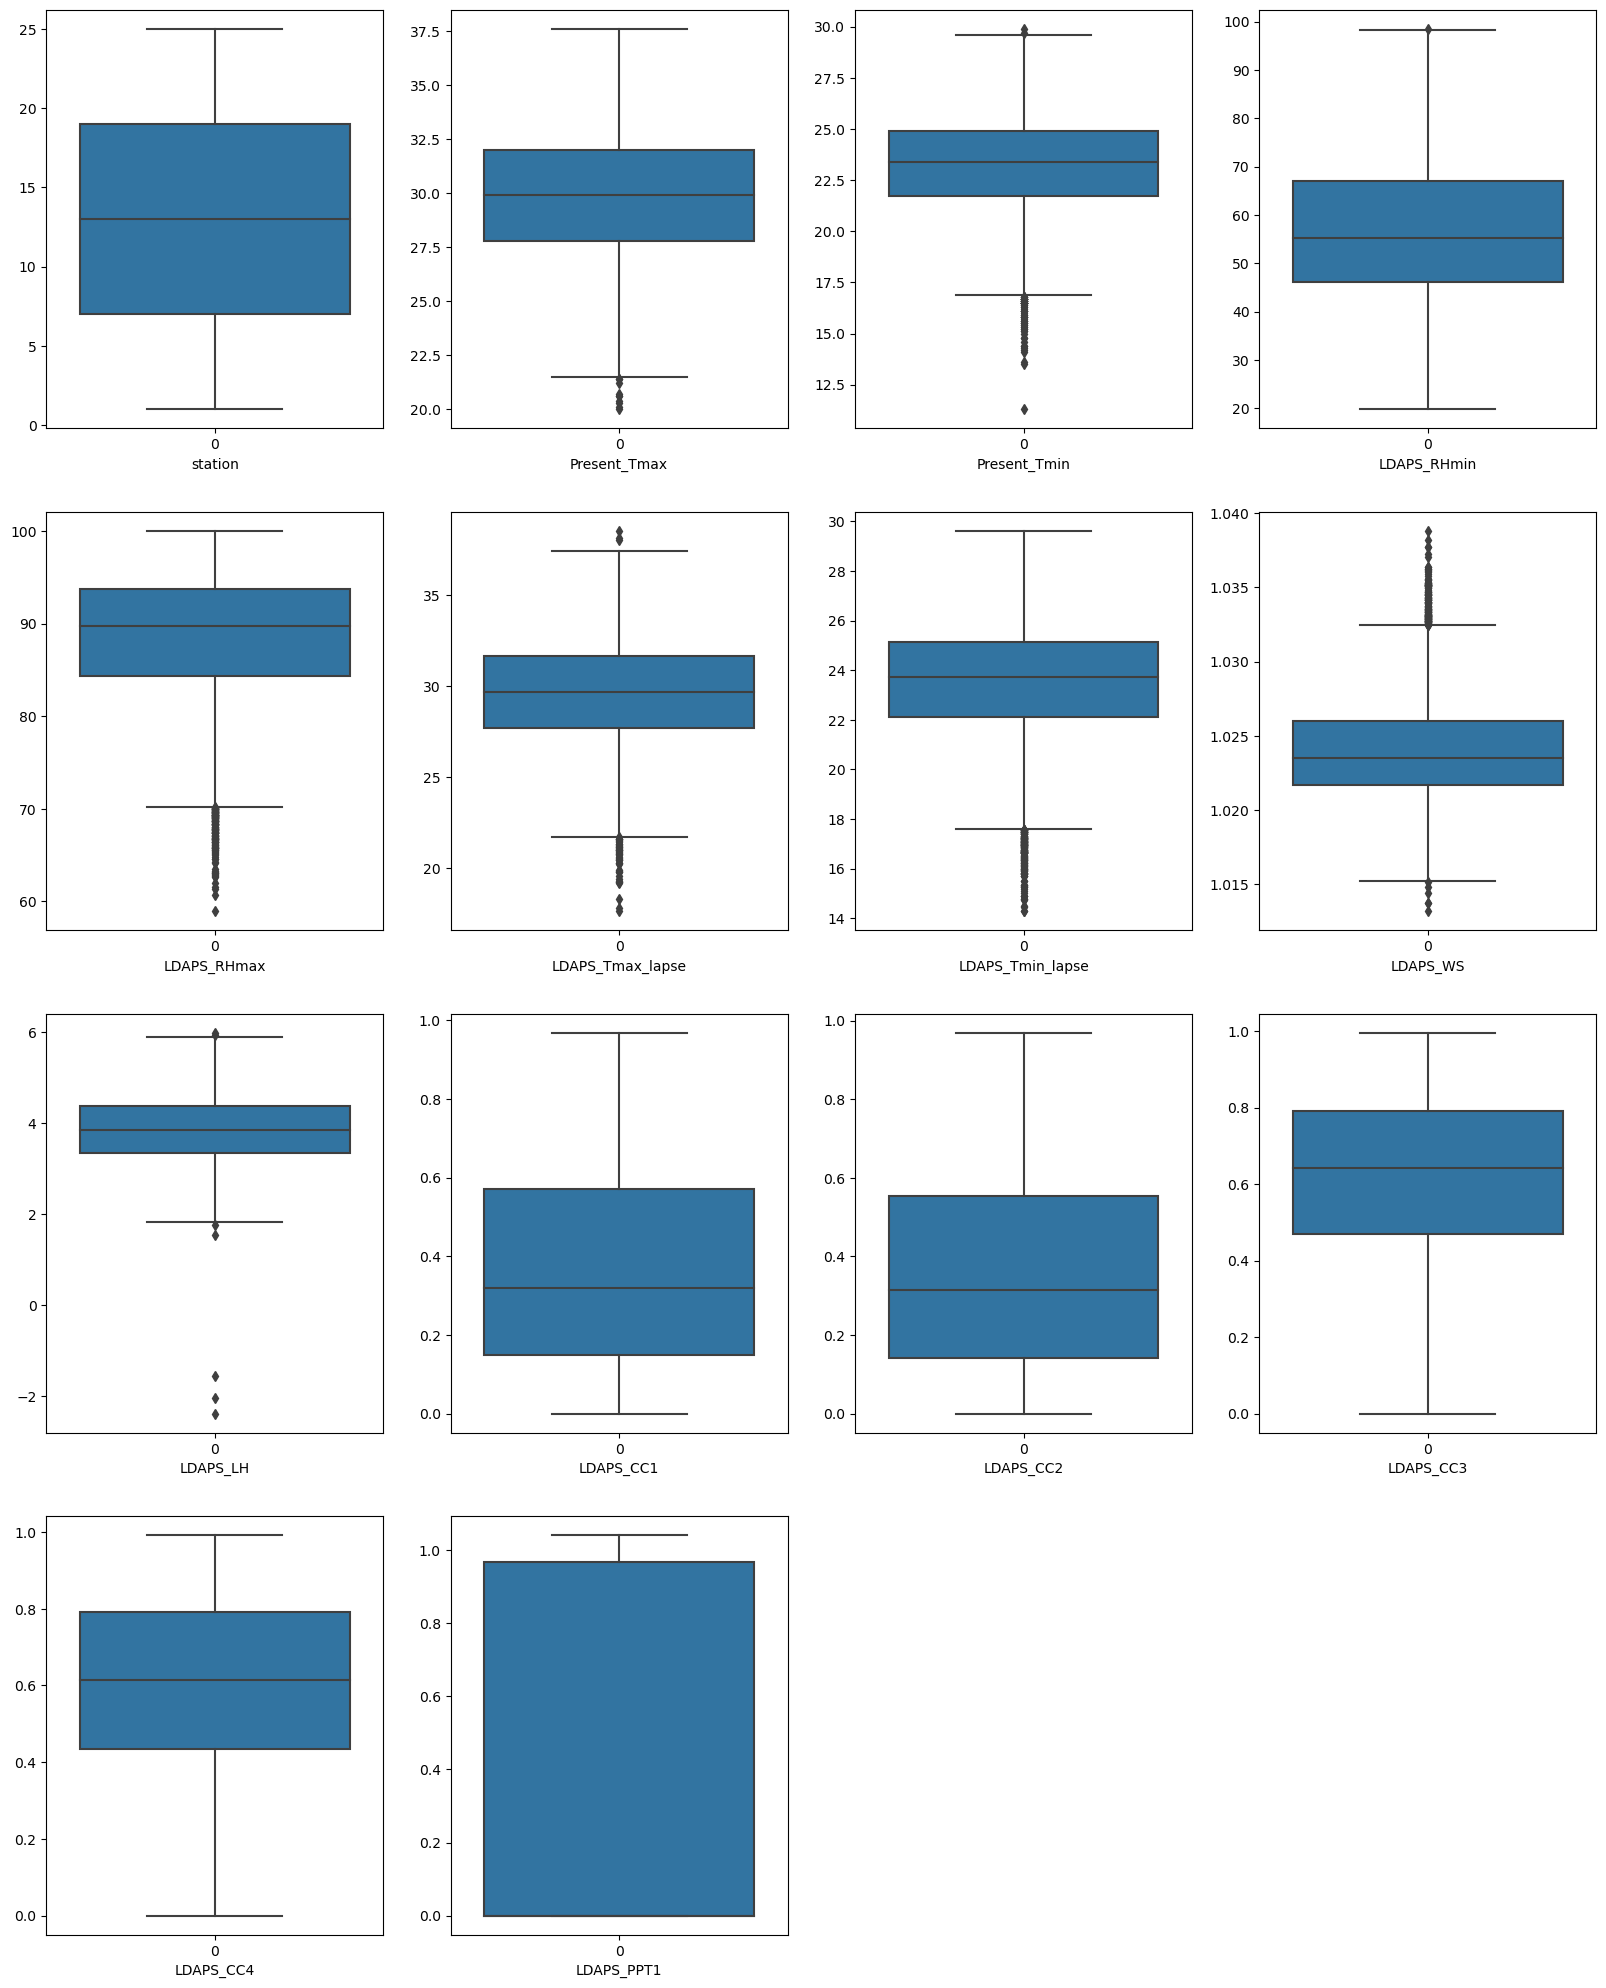

In [90]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in a :
    if p<=15:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


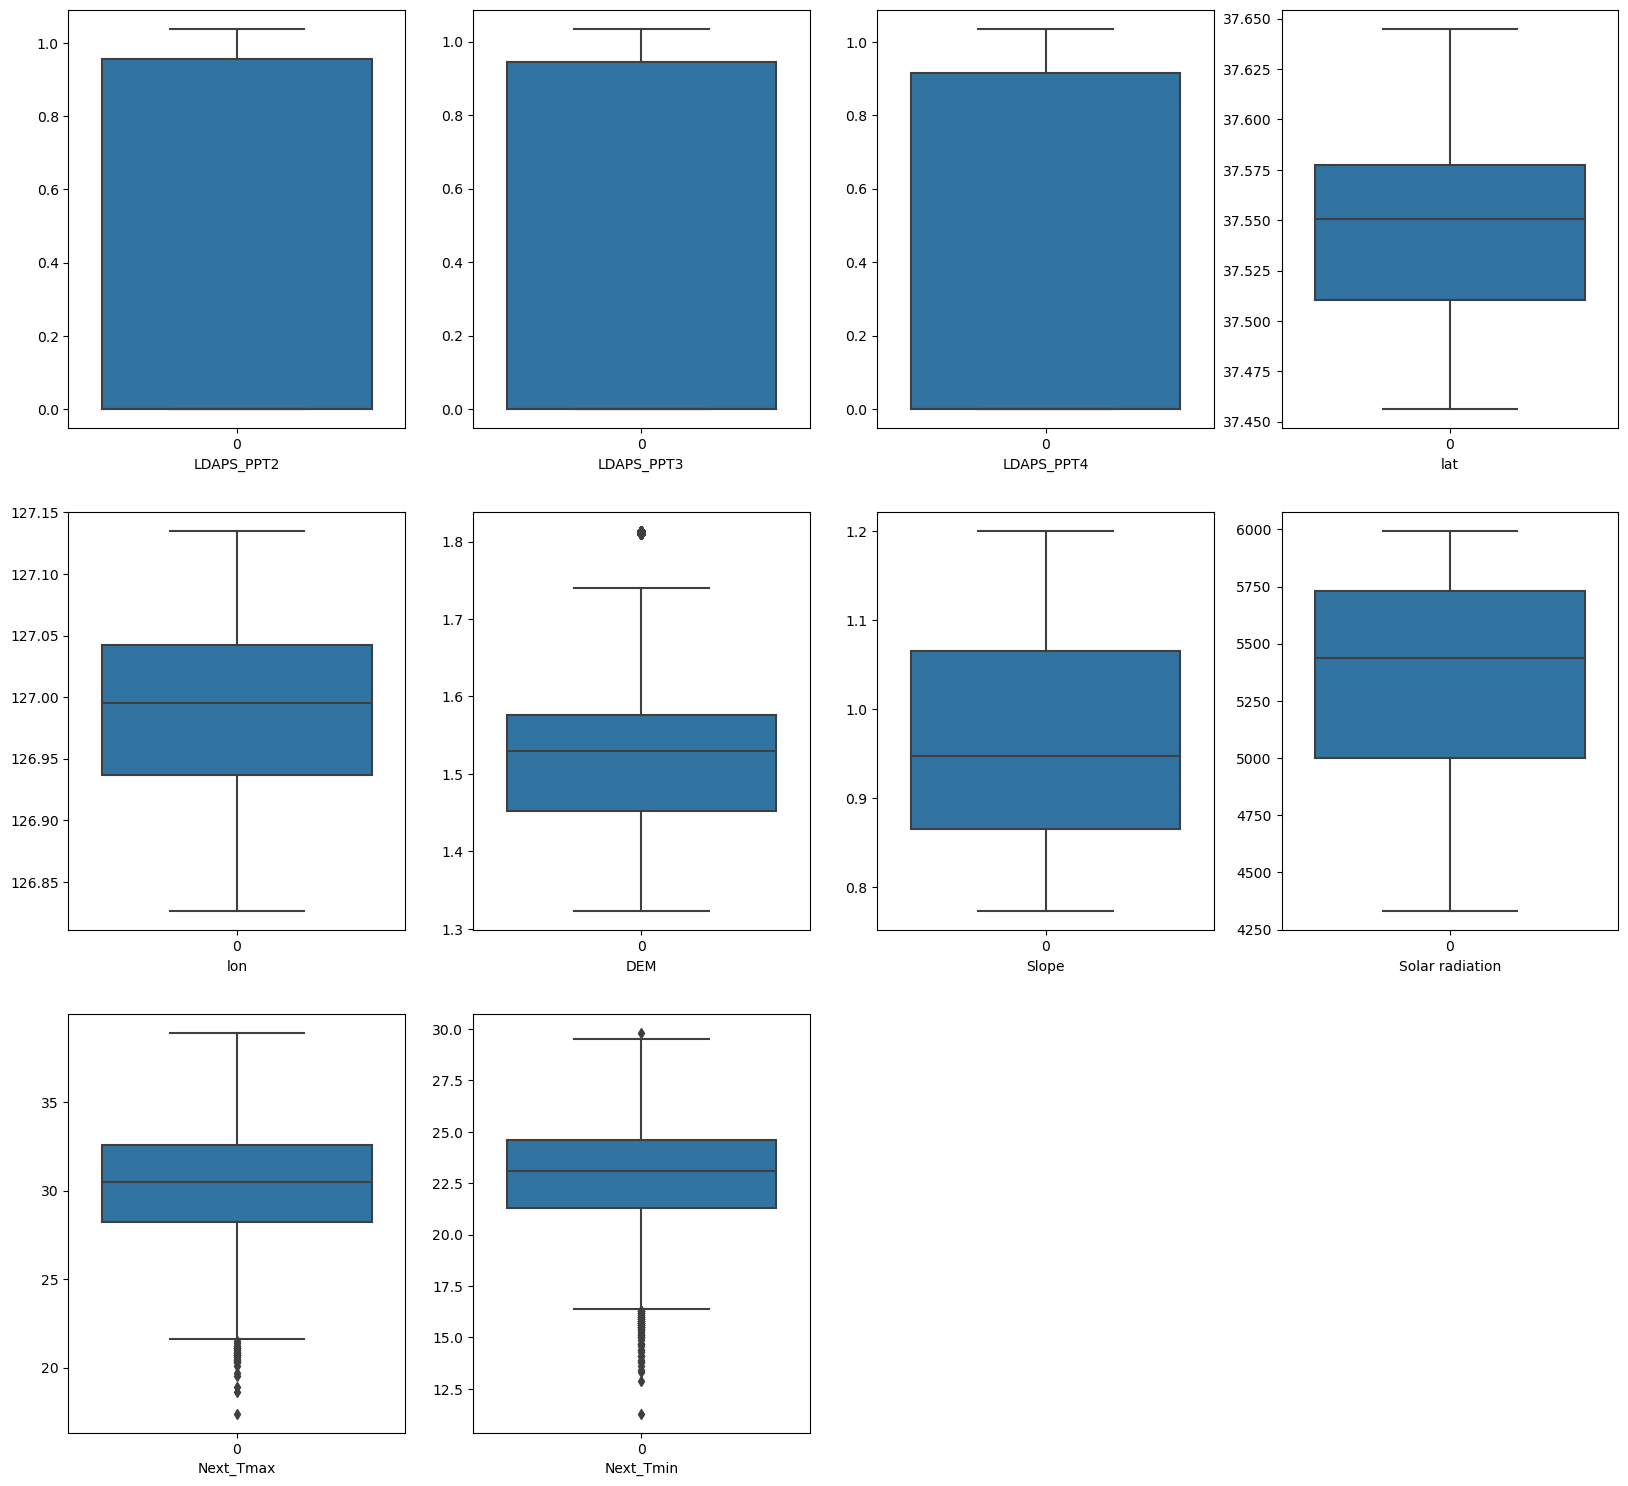

In [91]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in b:
    if p<=15:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


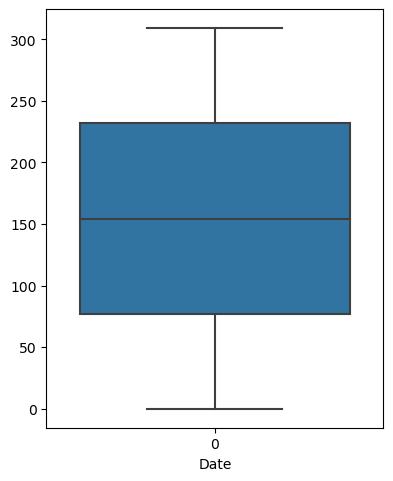

In [92]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in c:
    if p<=15:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


In [ ]:
# we can see from these boxplots that there are outliers present in the columns
# outliers are present in :- 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse'
# , 'LDAPS_WS', 'LDAPS_LH' , 'DEM' ,  'Next_Tmax', 'Next_Tmin'

In [93]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [132]:
#removing outliers
from scipy.stats import zscore
d=df[['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']]
z=np.abs(zscore(d))
z

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.664663,1.725224,0.361913,0.760330,0.103957,0.383605,0.526903,0.216792,0.000680,0.375043,0.515461,0.591963,0.323482,0.353945,0.773252,0.709328,0.680323,0.589555,1.188219,0.004705,2.141993,1.253388,1.516820,0.376352,0.697875
1,1.526035,1.725224,0.720643,0.677021,0.307297,0.312101,0.079953,0.224302,0.655258,0.129690,0.547802,0.405353,0.334989,0.371647,0.773252,0.709328,0.680323,0.589555,1.188219,0.512235,0.072892,0.333533,1.228776,0.071901,0.174319
2,1.387408,1.725224,0.619154,0.031110,0.552509,0.614626,0.162140,0.451966,0.381895,1.447655,0.609748,0.383143,0.124440,0.294202,0.773252,0.709328,0.680323,0.589555,0.652150,0.840050,0.451874,0.875741,1.215358,0.264009,0.389511
3,1.248780,1.725224,0.754473,0.072765,0.102866,1.133710,0.030062,0.079822,0.681960,0.275508,0.582814,0.505795,0.326228,0.335884,0.773252,0.709328,0.680323,0.589555,1.990336,0.386152,0.045388,1.156922,1.199997,0.456117,0.550605
4,1.110152,1.725224,0.551494,0.552057,0.038904,0.249269,0.171711,0.011044,0.627945,1.241168,0.831774,0.412276,0.238986,0.157903,0.773252,0.709328,0.680323,0.589555,0.118067,1.810888,0.387791,0.347923,1.206027,0.296027,0.174319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,1.107891,1.729377,2.256387,2.259902,2.199745,1.412928,0.616195,2.235007,0.117220,2.263964,1.209265,1.269118,2.789733,1.814170,0.773252,0.709328,0.680323,0.589555,0.118067,0.613101,0.745957,0.241718,2.065260,0.856623,2.107448
7746,1.246518,1.729377,2.459367,2.426521,1.828737,0.654255,0.994601,2.444802,0.607126,0.689696,1.157304,1.291142,2.751872,1.403105,0.773252,0.709328,0.680323,0.589555,0.686036,1.193082,0.964831,1.404336,2.098405,0.728551,2.349089
7747,1.385146,1.729377,2.188728,2.551485,2.058894,1.327892,1.115121,2.032211,0.375589,0.442598,1.296900,1.070851,2.789733,2.508351,0.773252,0.709328,0.680323,0.589555,0.149967,1.265534,1.370136,1.290082,2.094885,0.632496,1.946354
7748,1.523774,1.729377,2.188728,2.301557,2.244243,1.547988,0.890319,2.050299,0.150556,0.284000,1.274521,1.094521,2.789733,2.508351,0.773252,0.709328,0.680323,0.589555,0.418002,1.038585,1.248920,1.017046,2.106400,0.536442,1.664439


In [133]:
# above table shows z score of all columns 
# z score less than 3 contains 99.7% data
np.where(z>3)
#z score greater than 3 meaning outliers
# these values represent outliers

(array([  25,   44,  194,  344,  375,  394,  569,  575,  594, 1321, 1421,
        1649, 1658, 1660, 1661, 1667, 1671, 2172, 2173, 2174, 2176, 2177,
        2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188,
        2190, 2191, 2192, 2194, 2195, 2196, 2350, 2366, 2391, 2540, 2671,
        2737, 2746, 2771, 3162, 3180, 3186, 3187, 3187, 3198, 3205, 3207,
        3211, 3212, 3216, 3220, 3257, 3259, 3260, 3262, 3264, 3268, 3269,
        3282, 3284, 3285, 3294, 3371, 3390, 3396, 3415, 3473, 3476, 3478,
        3479, 3481, 3482, 3483, 3484, 3485, 3489, 3490, 3491, 3493, 3494,
        3495, 3521, 3713, 3961, 4466, 4482, 4540, 4552, 4554, 4579, 4757,
        4757, 5001, 5002, 5006, 5010, 5011, 5012, 5013, 5038, 5038, 5063,
        5151, 5152, 5161, 5975, 5985, 6051, 6060, 6061, 6063, 6069, 6069,
        6074, 6075, 6076, 6076, 6079, 6085, 6086, 6094, 6100, 6101, 6110,
        6110, 6110, 6111, 6119, 6126, 6129, 6135, 6135, 6135, 6136, 6136,
        6138, 6138, 6138, 6144, 6144, 

In [134]:
import numpy as np  
outlier_indices = np.where(z > 3)[1]
df1 = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", df1.shape)

Original DataFrame Shape: (7723, 25)
DataFrame Shape after Removing Outliers: (7714, 25)


In [135]:
# 9 rows have been deleted
#this is percentage loss of data. max data that we can afford to lose is 10%
# since our value is 0.11% we lose 0.11% data which is within 10% range
#we cannot lose too much data as some data might be essential for model building
(df.shape[0]-df1.shape[0])/(df.shape[0])*100

0.11653502524925548

# CHECK FOR CORRELATION AND MULTICOLLINEARTY

In [102]:
df1.corr()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.000641,0.113395,0.132072,-0.068337,-0.167983,0.069997,0.104857,0.010599,-0.132966,0.005690,0.002034,-0.002209,0.007823,-0.006971,-0.019041,-0.036926,-0.007193,-0.238518,-0.118851,-0.301896,-0.134758,-0.019813,0.108452,0.128809
Date,0.000641,1.000000,0.073946,0.042962,-0.044231,-0.165328,0.019169,-0.015851,-0.141142,0.047326,-0.108186,-0.075173,0.075102,0.105586,-0.150163,-0.121955,-0.045942,-0.012464,-0.000098,-0.003448,-0.000542,-0.000899,-0.199883,0.066557,0.016373
Present_Tmax,0.113395,0.073946,1.000000,0.617974,-0.206833,-0.304243,0.569244,0.623243,-0.112825,0.114552,-0.313431,-0.215004,-0.116440,-0.115376,-0.179338,-0.129634,-0.107204,-0.092138,-0.054098,0.007823,-0.165825,-0.108188,-0.027795,0.609786,0.622364
Present_Tmin,0.132072,0.042962,0.617974,1.000000,0.120632,-0.018077,0.462189,0.762392,-0.016478,-0.014846,0.083359,0.088977,0.017517,-0.016767,0.106568,0.121042,0.015479,-0.068804,-0.081271,-0.045418,-0.256484,-0.171363,0.051465,0.470284,0.796414
LDAPS_RHmin,-0.068337,-0.044231,-0.206833,0.120632,1.000000,0.578910,-0.569040,0.086388,0.263631,-0.023254,0.613202,0.744998,0.645275,0.498320,0.437059,0.556347,0.490645,0.325721,0.085367,-0.077785,0.081762,0.086526,0.243000,-0.442525,0.093069
LDAPS_RHmax,-0.167983,-0.165328,-0.304243,-0.018077,0.578910,1.000000,-0.377733,-0.117131,0.109440,0.272825,0.436616,0.391291,0.180827,0.105605,0.403230,0.411622,0.296434,0.146602,0.194023,0.023990,0.176406,0.187184,0.149400,-0.287507,-0.075334
LDAPS_Tmax_lapse,0.069997,0.019169,0.569244,0.462189,-0.569040,-0.377733,1.000000,0.653379,-0.271600,0.001998,-0.440720,-0.526201,-0.458301,-0.370540,-0.280223,-0.388183,-0.359811,-0.286635,-0.044355,0.089955,-0.152744,-0.123118,0.046562,0.828398,0.586573
LDAPS_Tmin_lapse,0.104857,-0.015851,0.623243,0.762392,0.086388,-0.117131,0.653379,1.000000,-0.097251,-0.143282,0.009065,0.045953,0.010874,-0.031012,0.014335,0.019222,-0.054311,-0.128792,-0.098671,-0.026816,-0.195875,-0.172847,0.157796,0.586744,0.881380
LDAPS_WS,0.010599,-0.141142,-0.112825,-0.016478,0.263631,0.109440,-0.271600,-0.097251,1.000000,-0.015448,0.266865,0.232385,0.133832,0.130976,0.260275,0.240562,0.156193,0.193346,0.016049,-0.068330,0.158910,0.135910,0.140630,-0.307535,-0.064549
LDAPS_LH,-0.132966,0.047326,0.114552,-0.014846,-0.023254,0.272825,0.001998,-0.143282,-0.015448,1.000000,-0.103747,-0.213504,-0.196530,-0.149366,0.004273,-0.059609,-0.023559,0.001258,0.093935,0.010111,0.068789,0.049375,-0.049188,0.123669,-0.063991


<Axes: >

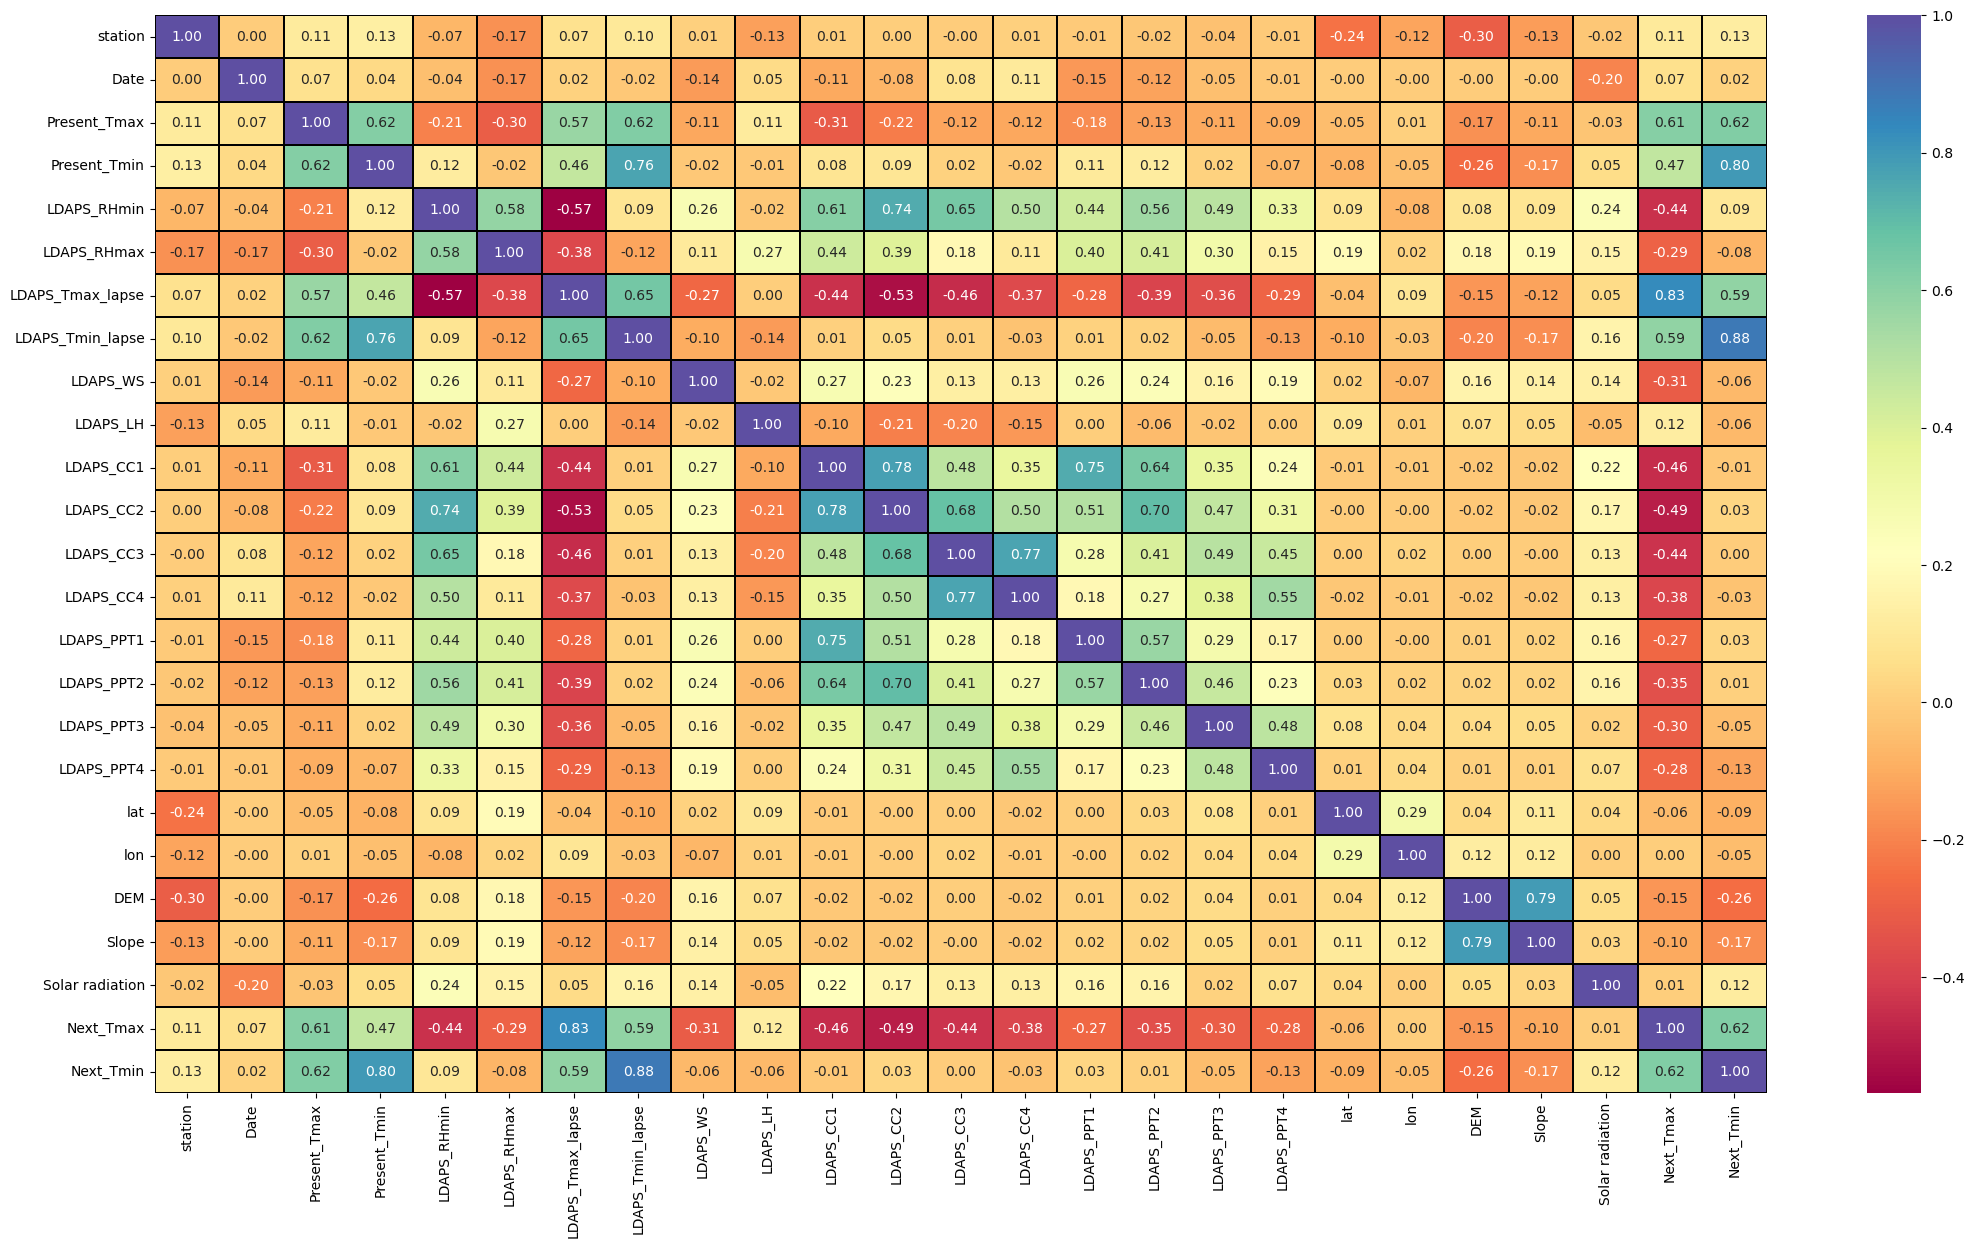

In [103]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heat map for new dataset

In [ ]:
# 1) we can see from the above data that most of the column are not much correlated with each other
# 2) there is high correlation b/w 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2',
#    'LDAPS_PPT3', 'LDAPS_PPT4' which can cause multicollinearity
# 3)'Next_Tmax' which is label/target have also low correlation to other columns except for 'Present_Tmax' , 'Present_Tmin'
#   'LDAPS_Tmax_lapse' , 'LDAPS_Tmin_lapse' , 'Next_Tmin'(high correlations)
# 4) 'Next_Tmin' which is label/target have also low correlation with other columns except for 'Present_Tmax' , 'Present_Tmin'
#   'LDAPS_Tmax_lapse' , 'LDAPS_Tmin_lapse' , 'Next_Tmax'(high correlations)

In [136]:
x=df1.drop(['Next_Tmax'],axis=1)
x

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,1.0,0.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.023983,4.110499,0.233947,0.203896,0.544796,0.507783,0.0,0.0,0.0,0.0,37.6046,126.991,1.813669,1.120534,5992.895996,21.2
1,2.0,0.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.021702,3.731014,0.225508,0.251771,0.542254,0.503610,0.0,0.0,0.0,0.0,37.6046,127.032,1.525579,0.928740,5869.312500,22.5
4,5.0,0.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.021797,4.761697,0.151407,0.249995,0.563461,0.553989,0.0,0.0,0.0,0.0,37.5507,127.135,1.484621,0.927001,5859.552246,22.5
10,11.0,0.0,31.7,23.5,51.156395,85.385635,29.694724,24.432646,1.023205,3.818797,0.175334,0.281866,0.595776,0.546152,0.0,0.0,0.0,0.0,37.5372,127.085,1.452068,0.948830,5864.000977,24.5
11,12.0,0.0,31.6,22.2,51.288349,80.338013,28.936314,24.365949,1.023229,3.062372,0.251017,0.256294,0.566811,0.508392,0.0,0.0,0.0,0.0,37.5507,126.988,1.720531,0.943609,5924.328613,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,309.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,1.023577,2.126355,0.052902,0.030169,0.000000,0.163615,0.0,0.0,0.0,0.0,37.5507,127.040,1.438034,0.939837,4456.024414,17.7
7746,22.0,309.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.021870,4.347071,0.066461,0.024518,0.008363,0.260501,0.0,0.0,0.0,0.0,37.5102,127.086,1.409565,0.799324,4441.803711,17.1
7747,23.0,309.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.022676,4.161290,0.030034,0.081035,0.000000,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,1.356847,0.813132,4443.313965,18.1
7748,24.0,309.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,1.023461,3.614996,0.035874,0.074962,0.000000,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,1.372614,0.846131,4438.373535,18.8


In [137]:
y=df1['Next_Tmax']
y

0       29.1
1       30.5
4       31.2
10      31.2
11      32.6
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7714, dtype: float64

In [138]:
# standard scaler is done so as to make all values from whole data on the same level/range.
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df2=pd.DataFrame(s.fit_transform(x),columns=x.columns)
df2

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.665276,-1.729235,-0.361011,-0.759965,0.103650,0.382747,-0.526841,-0.216469,-0.001172,0.374893,-0.515491,-0.591879,-0.323327,-0.354093,-0.773973,-0.70995,-0.680903,-0.590018,1.188124,-0.005347,2.141906,1.253366,1.518673,-0.697419
1,-1.526629,-1.729235,0.721215,-0.676691,-0.307386,0.311221,0.079698,0.224404,-0.655448,-0.129781,-0.547817,-0.405371,-0.334828,-0.371785,-0.773973,-0.70995,-0.680903,-0.590018,1.188124,0.511685,-0.073150,-0.333935,1.230547,-0.174103
2,-1.110687,-1.729235,0.552118,-0.551779,-0.039135,0.248370,-0.171835,-0.010824,-0.628147,1.240916,-0.831648,-0.412290,-0.238879,-0.158155,-0.773973,-0.70995,-0.680903,-0.590018,0.117774,1.810572,-0.388073,-0.348329,1.207792,-0.174103
3,-0.278804,-1.729235,0.653576,0.114419,-0.383320,-0.418384,0.026451,0.394924,-0.224268,-0.013040,-0.740001,-0.288132,-0.092674,-0.191388,-0.773973,-0.70995,-0.680903,-0.590018,-0.150310,1.180044,-0.638365,-0.167666,1.218164,0.630999
4,-0.140157,-1.729235,0.619757,-0.426867,-0.374269,-1.124020,-0.232476,0.366322,-0.217392,-1.019004,-0.450108,-0.387752,-0.223724,-0.351510,-0.773973,-0.70995,-0.680903,-0.590018,0.117774,-0.043179,1.425789,-0.210880,1.358813,-0.294868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7709,1.107668,1.729363,-2.254906,-2.258910,-2.198830,-1.414324,-0.616086,-2.233672,-0.117658,-2.263805,-1.208952,-1.268666,-2.788172,-1.813537,-0.773973,-0.70995,-0.680903,-0.590018,0.117774,0.612570,-0.746267,-0.242098,-2.064425,-2.106347
7710,1.246315,1.729363,-2.457823,-2.425459,-1.828019,-0.655424,-0.994294,-2.443361,-0.607338,0.689508,-1.157017,-1.290678,-2.750333,-1.402692,-0.773973,-0.70995,-0.680903,-0.590018,-0.686478,1.192655,-0.965157,-1.404995,-2.097580,-2.347877
7711,1.384962,1.729363,-2.187267,-2.550371,-2.058053,-1.329262,-1.114750,-2.030977,-0.375908,0.442440,-1.296544,-1.070507,-2.788172,-2.507348,-0.773973,-0.70995,-0.680903,-0.590018,-0.150310,-1.266402,-1.370493,-1.290714,-2.094059,-1.945326
7712,1.523610,1.729363,-2.187267,-2.300547,-2.243304,-1.549423,-0.890066,-2.049057,-0.150979,-0.284073,-1.274176,-1.094164,-2.788172,-2.507348,-0.773973,-0.70995,-0.680903,-0.590018,-0.418394,-1.039412,-1.249268,-1.017612,-2.105577,-1.663541


In [139]:
# vif factor is checked for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df2.values,i) for i in range(len(df2.columns))]
vif['features']=df2.columns
vif

,VIF values,features
0,1.250314,station
1,1.168037,Date
2,2.781946,Present_Tmax
3,3.480267,Present_Tmin
4,6.455978,LDAPS_RHmin
5,2.368297,LDAPS_RHmax
6,7.421378,LDAPS_Tmax_lapse
7,8.985121,LDAPS_Tmin_lapse
8,1.269821,LDAPS_WS
9,1.475498,LDAPS_LH


In [ ]:
# vif values for some columns are high but not too much high(like 100)
# since vif values for all the columns are low we don't have to remove any columns fortunately
# some columns having high vif than others LDAPS_RHmin -> 6.455978 , LDAPS_Tmax_lapse -> 7.421378 etc

# MODEL BUILDING FOR Next_Tmax COLUMN

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import Lasso  , Ridge 

In [141]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.30,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test,predlr)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('max r2 is',maxaccu,'at random state',maxrs)

max r2 is 0.8038771376717899 at random state 96


In [143]:
x1_train,x1_test,y1_train,y1_test=train_test_split(df2,y,test_size=0.30,random_state=96)

In [144]:
lr=LinearRegression()
lr.fit(x1_train,y1_train)
predlr1=lr.predict(x1_test)
pred_train_lr1=lr.predict(x1_train)
print(lr)
print('r2 score',r2_score(y1_test,predlr1))
print('r2 score on training data',r2_score(y1_train,pred_train_lr1))
print('mean absolute error',mean_absolute_error(y1_test,predlr1))
print('mean squared error',mean_squared_error(y1_test,predlr1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predlr1)))

LinearRegression()
r2 score 0.8038771376717899
r2 score on training data 0.7814292485413685
mean absolute error 1.0558039111437976
mean squared error 1.9246537376652022
root mean squared error 1.3873189026554789


In [145]:
rfr=RandomForestRegressor()
rfr.fit(x1_train,y1_train)
predrfr1=rfr.predict(x1_test)
pred_train_rfr1=rfr.predict(x1_train)
print(rfr)
print('r2 score',r2_score(y1_test,predrfr1))
print('r2 score on training data',r2_score(y1_train,pred_train_rfr1))
print('mean absloute error',mean_absolute_error(y1_test,predrfr1))
print('mean squared error',mean_squared_error(y1_test,predrfr1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predrfr1)))

RandomForestRegressor()
r2 score 0.9175301033554055
r2 score on training data 0.9878654189407431
mean absloute error 0.6693157667386608
mean squared error 0.8093191835853127
root mean squared error 0.8996216891478955


In [146]:
knn=KNeighborsRegressor()
knn.fit(x1_train,y1_train)
predknn1=knn.predict(x1_test)
pred_train_knn1=knn.predict(x1_train)
print(knn)
print('r2 score',r2_score(y1_test,predknn1))
print('r2 score on training data',r2_score(y1_train,pred_train_knn1))
print('mean absloute error',mean_absolute_error(y1_test,predknn1))
print('mean squared error',mean_squared_error(y1_test,predknn1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predknn1)))

KNeighborsRegressor()
r2 score 0.8615694105042643
r2 score on training data 0.906374661947791
mean absloute error 0.8607948164146867
mean squared error 1.3584900215982718
root mean squared error 1.1655428012725537


In [147]:
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
preddtr1=dtr.predict(x1_test)
pred_train_dtr1=dtr.predict(x1_train)
print(dtr)
print('r2 score',r2_score(y1_test,preddtr1))
print('r2 score on training data',r2_score(y1_train,pred_train_dtr1))
print('mean absloute error',mean_absolute_error(y1_test,preddtr1))
print('mean squared error',mean_squared_error(y1_test,preddtr1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,preddtr1)))

DecisionTreeRegressor()
r2 score 0.8085246470447384
r2 score on training data 1.0
mean absloute error 0.9924406047516199
mean squared error 1.8790453563714902
root mean squared error 1.3707827531638594


In [148]:
l=Lasso()
l.fit(x1_train,y1_train)
predl1=l.predict(x1_test)
pred_train_l1=l.predict(x1_train)
print(l)
print('r2 score',r2_score(y1_test,predl1))
print('r2 score on training data',r2_score(y1_train,pred_train_l1))
print('mean absloute error',mean_absolute_error(y1_test,predl1))
print('mean squared error',mean_squared_error(y1_test,predl1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predl1)))

Lasso()
r2 score 0.5941422522077457
r2 score on training data 0.5800598457005086
mean absloute error 1.5899171679853776
mean squared error 3.98288920514284
root mean squared error 1.9957177167983553


In [149]:
r=Ridge()
r.fit(x1_train,y1_train)
predr1=r.predict(x1_test)
pred_train_r1=r.predict(x1_train)
print(r)
print('r2 score',r2_score(y1_test,predr1))
print('r2 score on training data',r2_score(y1_train,pred_train_r1))
print('mean absloute error',mean_absolute_error(y1_test,predr1))
print('mean squared error',mean_squared_error(y1_test,predr1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predr1)))

Ridge()
r2 score 0.8038793314729302
r2 score on training data 0.7814290601763663
mean absloute error 1.055770381729401
mean squared error 1.9246322087750254
root mean squared error 1.3873111434624266


In [150]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
lrscore1=cvs(lr,df2,y,scoring='r2')
print(lrscore1)
print(lrscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predlr1)-lrscore1.mean())*100)

[0.67276106 0.67128657 0.69743544 0.83866347 0.64249881]
0.7045290715153538
difference b/w r2 score and cross validation score 9.934806615643609


In [151]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
rfrscore1=cvs(rfr,df2,y,scoring='r2')
print(rfrscore1)
print(rfrscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predrfr1)-rfrscore1.mean())*100)

[0.65197964 0.66733956 0.66606298 0.83597206 0.42642317]
0.6495554812736424
difference b/w r2 score and cross validation score 26.797462208176313


In [152]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
knnscore1=cvs(knn,df2,y,scoring='r2')
print(knnscore1)
print(knnscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predknn1)-knnscore1.mean())*100)

[0.56148718 0.4139564  0.52182159 0.74029828 0.51978601]
0.551469893379168
difference b/w r2 score and cross validation score 31.009951712509633


In [153]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
dtrscore1=cvs(dtr,df2,y,scoring='r2')
print(dtrscore1)
print(dtrscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,preddtr1)-dtrscore1.mean())*100)

[0.17906471 0.40160917 0.37602858 0.70455235 0.21401545]
0.3750540502228271
difference b/w r2 score and cross validation score 43.34705968219112


In [154]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
lscore1=cvs(l,df2,y,scoring='r2')
print(lscore1)
print(lscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predl1)-lscore1.mean())*100)

[0.50852498 0.53043349 0.57354588 0.50890729 0.59193258]
0.5426688448690863
difference b/w r2 score and cross validation score 5.147340733865946


In [155]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
rscore1=cvs(r,df2,y,scoring='r2')
print(rscore1)
print(rscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predr1)-rscore1.mean())*100)

[0.67292501 0.67126294 0.6973899  0.83869309 0.64253125]
0.7045604381059274
difference b/w r2 score and cross validation score 9.931889336700284


In [ ]:
#                                      lr      rfr      knn       dtr      l       r
# r2 score(%)                        80.38    91.75    86.15     80.38    59.41   80.38
# on training data(%)                78.14    98.78    90.63     1.0      58.00   78.14
# MAE                                1.055    0.669    0.860     0.992    1.589   1.055
# MSE                                1.924    0.809    1.358     1.879    3.982   1.924
# RMSE                               1.387    0.899    1.165     1.370    1.995   1.387
# cvs score(%)                       70.45    64.95    55.14     37.50    54.26   70.45
# difference b/w r2 and cvs score(%) 9.934    26.79    31.00     43.34    5.147   9.931

In [ ]:
# we can see from the above results that r is the best model for this as it's r2 score is 3rd highest (80.38%)
# and it's cvs score is highest compared to others(70.45%) and difference b/w cvs and r2 score is lowest compared to others
# (9.931)
# other model can be made from lr as its r2 score is 80.38% and cvs score(70.45%) same as r but difference in r2 and cvs score 
# is a little more than r (9.934)
# another best model can be then dtr after lr
# in dtr we can see that its accuracy on training data is 100% but on test data it's 80.38% so overfitting can be seen in this 
# case to some extent and others also show overfitting as rfr r2 score on training data is 98.78% but on test data it is 91.75% 
# etc and cvs score for rfr is low compared to it's r2 score 
# there is a lot of overfitting and errors in data as cvs score for rfr , knn , dtr are low compared to their r2 scores


# SAVING THE MODEL AND LOADING THE MODEL AND PREDICTING BASED ON THE MODEL

In [156]:
import joblib
joblib.dump(r,'Temperature Forecast (Next_Tmax PREDICTION)')

['Temperature Forecast (Next_Tmax PREDICTION)']

In [157]:
model=joblib.load('Temperature Forecast (Next_Tmax PREDICTION)')
prediction=model.predict(x1_test)
prediction
# prediction for x1_test

array([33.05928869, 29.85262902, 33.01717636, ..., 29.13511304,
       24.914017  , 26.35218083])

In [158]:
x1_test

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
4876,1.384962,0.453375,1.431426,0.322606,-0.563724,0.184474,0.579438,-0.237534,-0.983788,1.050067,-0.479111,-0.735633,-0.137135,0.331639,-0.773973,-0.709950,-0.680903,-0.590018,-0.150310,-1.266402,-1.370493,-1.290714,1.001828,0.228448
912,1.523610,-1.326291,0.213922,1.488451,1.477134,0.779653,0.236896,1.440399,0.310117,-0.506684,-0.383159,0.090181,0.577641,-0.147500,-0.773973,1.425700,1.448393,-0.590018,-0.418394,-1.039412,-1.249268,-1.017612,-0.143524,-0.214358
1008,0.969021,-1.281520,0.552118,1.821550,-0.191513,1.429930,0.601197,0.137976,1.463227,1.229304,0.990919,-0.097038,-2.788172,-2.507348,1.392799,1.307623,-0.680903,-0.590018,1.456208,0.158590,1.579093,1.815435,-0.163471,0.832274
669,-1.249335,-1.427027,0.653576,0.156056,1.603743,1.488249,-0.433820,-0.096412,0.375247,-0.250598,2.166400,1.537233,1.077488,1.382368,1.352895,1.471418,1.388223,1.716986,1.990390,0.385580,-0.045644,1.156877,0.378931,0.147938
4441,-0.001510,0.263096,0.619757,-0.551779,-1.467915,-0.933229,0.683799,-0.605311,0.957657,-0.831036,-0.858974,-0.606599,0.543526,0.988273,-0.773973,-0.709950,-0.680903,-0.590018,0.651956,1.154823,0.311208,1.216337,-1.485429,0.228448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,1.523610,-0.475633,-1.510876,-1.217976,-0.250070,-0.008912,-0.265799,-0.341763,-1.510666,-0.726719,0.037110,0.161014,0.374222,0.938160,1.291027,-0.709950,-0.680903,-0.590018,-0.418394,-1.039412,-1.249268,-1.017612,-1.147573,-0.013083
2621,-0.417451,-0.553983,-0.259552,-0.968152,0.835154,0.361690,-1.548896,-0.648898,-2.207831,-1.233186,-0.307128,0.787054,1.096590,1.150173,-0.773973,-0.709950,-0.680903,-0.590018,-1.758814,-0.459327,2.113746,1.914967,-0.674552,-1.381755
2725,0.137137,-0.509212,-0.056635,-0.593416,-0.263672,0.601029,-0.807308,-0.874354,-1.497765,-0.559188,0.173078,1.757465,1.312782,1.059374,1.218988,1.427147,1.535669,1.605717,-0.954562,-0.812422,-0.543615,-0.175113,-0.893019,0.027172
335,0.969021,-1.583728,-1.409417,-0.343592,2.579146,1.539755,-1.498808,0.175902,3.024855,-2.310325,2.173136,1.959175,1.649102,1.303225,1.407946,1.462411,1.550074,1.530414,1.456208,0.158590,1.579093,1.815435,1.116146,0.027172


In [159]:
y1_test

4897    34.8
923     28.8
1019    30.4
678     27.0
4462    30.8
        ... 
2823    28.9
2634    25.8
2738    24.7
344     25.1
3684    24.7
Name: Next_Tmax, Length: 2315, dtype: float64

In [160]:
import joblib
joblib.dump(rfr,'Temperature Forecast (Next_Tmax PREDICTION)1')

['Temperature Forecast (Next_Tmax PREDICTION)1']

In [161]:
model1=joblib.load('Temperature Forecast (Next_Tmax PREDICTION)1')
prediction1=model1.predict(x1_test)
prediction1
# prediction for x1_test

array([33.261, 28.19 , 31.157, ..., 26.567, 25.427, 25.675])

In [ ]:
# rfr model is showing more right prediction because it's r2 score is more than ridgge model

# MODEL BUILDING FOR Next_Tmin COLUMN

In [162]:
x1=df1.drop(['Next_Tmin'],axis=1)
x1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,1.0,0.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.023983,4.110499,0.233947,0.203896,0.544796,0.507783,0.0,0.0,0.0,0.0,37.6046,126.991,1.813669,1.120534,5992.895996,29.1
1,2.0,0.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.021702,3.731014,0.225508,0.251771,0.542254,0.503610,0.0,0.0,0.0,0.0,37.6046,127.032,1.525579,0.928740,5869.312500,30.5
4,5.0,0.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.021797,4.761697,0.151407,0.249995,0.563461,0.553989,0.0,0.0,0.0,0.0,37.5507,127.135,1.484621,0.927001,5859.552246,31.2
10,11.0,0.0,31.7,23.5,51.156395,85.385635,29.694724,24.432646,1.023205,3.818797,0.175334,0.281866,0.595776,0.546152,0.0,0.0,0.0,0.0,37.5372,127.085,1.452068,0.948830,5864.000977,31.2
11,12.0,0.0,31.6,22.2,51.288349,80.338013,28.936314,24.365949,1.023229,3.062372,0.251017,0.256294,0.566811,0.508392,0.0,0.0,0.0,0.0,37.5507,126.988,1.720531,0.943609,5924.328613,32.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,309.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,1.023577,2.126355,0.052902,0.030169,0.000000,0.163615,0.0,0.0,0.0,0.0,37.5507,127.040,1.438034,0.939837,4456.024414,27.6
7746,22.0,309.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.021870,4.347071,0.066461,0.024518,0.008363,0.260501,0.0,0.0,0.0,0.0,37.5102,127.086,1.409565,0.799324,4441.803711,28.0
7747,23.0,309.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.022676,4.161290,0.030034,0.081035,0.000000,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,1.356847,0.813132,4443.313965,28.3
7748,24.0,309.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,1.023461,3.614996,0.035874,0.074962,0.000000,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,1.372614,0.846131,4438.373535,28.6


In [166]:
y1=df1['Next_Tmin']
y1

0       21.2
1       22.5
4       22.5
10      24.5
11      22.2
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7714, dtype: float64

In [164]:
# standard scaler is done so as to make all values from whole data on the same level/range.
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x1=pd.DataFrame(s.fit_transform(x1),columns=x1.columns)
x1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-1.665276,-1.729235,-0.361011,-0.759965,0.103650,0.382747,-0.526841,-0.216469,-0.001172,0.374893,-0.515491,-0.591879,-0.323327,-0.354093,-0.773973,-0.70995,-0.680903,-0.590018,1.188124,-0.005347,2.141906,1.253366,1.518673,-0.375789
1,-1.526629,-1.729235,0.721215,-0.676691,-0.307386,0.311221,0.079698,0.224404,-0.655448,-0.129781,-0.547817,-0.405371,-0.334828,-0.371785,-0.773973,-0.70995,-0.680903,-0.590018,1.188124,0.511685,-0.073150,-0.333935,1.230547,0.072234
2,-1.110687,-1.729235,0.552118,-0.551779,-0.039135,0.248370,-0.171835,-0.010824,-0.628147,1.240916,-0.831648,-0.412290,-0.238879,-0.158155,-0.773973,-0.70995,-0.680903,-0.590018,0.117774,1.810572,-0.388073,-0.348329,1.207792,0.296245
3,-0.278804,-1.729235,0.653576,0.114419,-0.383320,-0.418384,0.026451,0.394924,-0.224268,-0.013040,-0.740001,-0.288132,-0.092674,-0.191388,-0.773973,-0.70995,-0.680903,-0.590018,-0.150310,1.180044,-0.638365,-0.167666,1.218164,0.296245
4,-0.140157,-1.729235,0.619757,-0.426867,-0.374269,-1.124020,-0.232476,0.366322,-0.217392,-1.019004,-0.450108,-0.387752,-0.223724,-0.351510,-0.773973,-0.70995,-0.680903,-0.590018,0.117774,-0.043179,1.425789,-0.210880,1.358813,0.744267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7709,1.107668,1.729363,-2.254906,-2.258910,-2.198830,-1.414324,-0.616086,-2.233672,-0.117658,-2.263805,-1.208952,-1.268666,-2.788172,-1.813537,-0.773973,-0.70995,-0.680903,-0.590018,0.117774,0.612570,-0.746267,-0.242098,-2.064425,-0.855813
7710,1.246315,1.729363,-2.457823,-2.425459,-1.828019,-0.655424,-0.994294,-2.443361,-0.607338,0.689508,-1.157017,-1.290678,-2.750333,-1.402692,-0.773973,-0.70995,-0.680903,-0.590018,-0.686478,1.192655,-0.965157,-1.404995,-2.097580,-0.727806
7711,1.384962,1.729363,-2.187267,-2.550371,-2.058053,-1.329262,-1.114750,-2.030977,-0.375908,0.442440,-1.296544,-1.070507,-2.788172,-2.507348,-0.773973,-0.70995,-0.680903,-0.590018,-0.150310,-1.266402,-1.370493,-1.290714,-2.094059,-0.631801
7712,1.523610,1.729363,-2.187267,-2.300547,-2.243304,-1.549423,-0.890066,-2.049057,-0.150979,-0.284073,-1.274176,-1.094164,-2.788172,-2.507348,-0.773973,-0.70995,-0.680903,-0.590018,-0.418394,-1.039412,-1.249268,-1.017612,-2.105577,-0.535797


In [167]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test,predlr)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('max r2 is',maxaccu,'at random state',maxrs)

max r2 is 0.8630112444437421 at random state 71


In [170]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=71)

In [171]:
lr=LinearRegression()
lr.fit(x1_train,y1_train)
predlr1=lr.predict(x1_test)
pred_train_lr1=lr.predict(x1_train)
print(lr)
print('r2 score',r2_score(y1_test,predlr1))
print('r2 score on training data',r2_score(y1_train,pred_train_lr1))
print('mean absolute error',mean_absolute_error(y1_test,predlr1))
print('mean squared error',mean_squared_error(y1_test,predlr1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predlr1)))

LinearRegression()
r2 score 0.8630112444437421
r2 score on training data 0.8406172280285324
mean absolute error 0.7478437953270888
mean squared error 0.8950307353053086
root mean squared error 0.9460606403953759


In [172]:
rfr=RandomForestRegressor()
rfr.fit(x1_train,y1_train)
predrfr1=rfr.predict(x1_test)
pred_train_rfr1=rfr.predict(x1_train)
print(rfr)
print('r2 score',r2_score(y1_test,predrfr1))
print('r2 score on training data',r2_score(y1_train,pred_train_rfr1))
print('mean absloute error',mean_absolute_error(y1_test,predrfr1))
print('mean squared error',mean_squared_error(y1_test,predrfr1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predrfr1)))

RandomForestRegressor()
r2 score 0.9221883079080638
r2 score on training data 0.9868580819132919
mean absloute error 0.5430423326133912
mean squared error 0.5083910406047517
root mean squared error 0.7130154560770416


In [173]:
knn=KNeighborsRegressor()
knn.fit(x1_train,y1_train)
predknn1=knn.predict(x1_test)
pred_train_knn1=knn.predict(x1_train)
print(knn)
print('r2 score',r2_score(y1_test,predknn1))
print('r2 score on training data',r2_score(y1_train,pred_train_knn1))
print('mean absloute error',mean_absolute_error(y1_test,predknn1))
print('mean squared error',mean_squared_error(y1_test,predknn1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predknn1)))

KNeighborsRegressor()
r2 score 0.8706565635513539
r2 score on training data 0.9095079662292874
mean absloute error 0.7131231101511879
mean squared error 0.845079222462203
root mean squared error 0.9192819058712094


In [174]:
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
preddtr1=dtr.predict(x1_test)
pred_train_dtr1=dtr.predict(x1_train)
print(dtr)
print('r2 score',r2_score(y1_test,preddtr1))
print('r2 score on training data',r2_score(y1_train,pred_train_dtr1))
print('mean absloute error',mean_absolute_error(y1_test,preddtr1))
print('mean squared error',mean_squared_error(y1_test,preddtr1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,preddtr1)))

DecisionTreeRegressor()
r2 score 0.8084461252820409
r2 score on training data 1.0
mean absloute error 0.8245788336933045
mean squared error 1.251537796976242
root mean squared error 1.1187215010789067


In [175]:
l=Lasso()
l.fit(x1_train,y1_train)
predl1=l.predict(x1_test)
pred_train_l1=l.predict(x1_train)
print(l)
print('r2 score',r2_score(y1_test,predl1))
print('r2 score on training data',r2_score(y1_train,pred_train_l1))
print('mean absloute error',mean_absolute_error(y1_test,predl1))
print('mean squared error',mean_squared_error(y1_test,predl1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predl1)))

Lasso()
r2 score 0.6265341338418997
r2 score on training data 0.6134897205334993
mean absloute error 1.2327139765612842
mean squared error 2.44007931484307
root mean squared error 1.5620753230376152


In [176]:
r=Ridge()
r.fit(x1_train,y1_train)
predr1=r.predict(x1_test)
pred_train_r1=r.predict(x1_train)
print(r)
print('r2 score',r2_score(y1_test,predr1))
print('r2 score on training data',r2_score(y1_train,pred_train_r1))
print('mean absloute error',mean_absolute_error(y1_test,predr1))
print('mean squared error',mean_squared_error(y1_test,predr1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predr1)))

Ridge()
r2 score 0.8630116675199904
r2 score on training data 0.8406171374371169
mean absloute error 0.7478535827751264
mean squared error 0.8950279710912382
root mean squared error 0.9460591794868005


In [177]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
lrscore1=cvs(lr,x1,y1,scoring='r2')
print(lrscore1)
print(lrscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predlr1)-lrscore1.mean())*100)

[0.73483215 0.67561219 0.80952731 0.87556212 0.87862715]
0.7948321850195134
difference b/w r2 score and cross validation score 6.817905942422875


In [178]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
rfrscore1=cvs(rfr,x1,y1,scoring='r2')
print(rfrscore1)
print(rfrscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predrfr1)-rfrscore1.mean())*100)

[0.67601811 0.68111098 0.8269054  0.86963045 0.86690051]
0.7841130897408861
difference b/w r2 score and cross validation score 13.807521816717772


In [179]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
knnscore1=cvs(knn,x1,y1,scoring='r2')
print(knnscore1)
print(knnscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predknn1)-knnscore1.mean())*100)

[0.44804329 0.44065578 0.64497023 0.74813273 0.79328442]
0.6150172909194938
difference b/w r2 score and cross validation score 25.563927263186017


In [180]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
dtrscore1=cvs(dtr,x1,y1,scoring='r2')
print(dtrscore1)
print(dtrscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,preddtr1)-dtrscore1.mean())*100)

[0.29240465 0.43929687 0.66156548 0.76968189 0.51236002]
0.5350617817980863
difference b/w r2 score and cross validation score 27.338434348395456


In [181]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
lscore1=cvs(l,x1,y1,scoring='r2')
print(lscore1)
print(lscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predl1)-lscore1.mean())*100)

[0.55616962 0.44100356 0.59954318 0.52774347 0.66491238]
0.5578744425971863
difference b/w r2 score and cross validation score 6.865969124471338


In [182]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
rscore1=cvs(r,x1,y1,scoring='r2')
print(rscore1)
print(rscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predr1)-rscore1.mean())*100)

[0.7348767  0.67567177 0.80950013 0.87556413 0.87864346]
0.7948512363883015
difference b/w r2 score and cross validation score 6.81604311316889


In [ ]:
#                                      lr      rfr      knn       dtr      l       r
# r2 score(%)                        86.30    92.21    87.06     80.84    62.65   86.30
# on training data                   84.06    98.68    90.95     1.0      61.34   84.06
# MAE                                0.747    0.543    0.713     0.824    1.232   0.747
# MSE                                0.895    0.508    0.845     1.251    2.440   0.895
# RMSE                               0.946    0.713    0.919     1.118    1.562   0.946
# cvs score                          79.48    78.41    61.50     53.50    55.78   79.48
# difference b/w r2 and cvs score    6.817    13.80    25.56     27.33    6.865   6.816

In [ ]:
# we can see from the above results that rfr is the best model for this as it's r2 score(92.21) is highest and its MAE(0.543),
# MSE(0.508) and RMSE(0.713) are low compared to others and it's cvs score(78.41) is also high(2nd highest) and difference
# b/w cvs and r2 score(13.80) is less compared to others(2nd lowest)
# other model can be made from lr and r as its r2 score is 86.30% which is best after rfr
# in dtr we can see that its accuracy on training data is 100% but on test data it's 80.84% so overfitting can be seen in this 
# case to some extent and others also show overfitting as rfr r2 score on training data is 98.68% but on test data it is 92.21%
# and it's cvs score is low compared to lr and r etc
# there is a little of overfitting and errors in data as cvs score for lr , r and rfr are less than 80% but overall model build
# on these are good


# SAVING THE MODEL AND LOADING THE MODEL AND PREDICTING BASED ON THE MODEL

In [183]:
# saving the model and loading the model and predicting based on the model
import joblib
joblib.dump(rfr,'Temperature Forecast (Next_Tmin PREDICTION)')

['Temperature Forecast (Next_Tmin PREDICTION)']

In [184]:
model=joblib.load('Temperature Forecast (Next_Tmin PREDICTION)')
prediction=model.predict(x1_test)
prediction


array([24.823, 23.991, 24.089, ..., 22.347, 22.945, 25.104])

In [185]:
x1_test

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
2300,-0.001510,-0.699491,1.025591,0.489155,-0.806976,-0.259443,1.574410,0.736334,-1.101006,-0.418956,-0.307275,-0.023791,-0.158876,0.274869,1.289802,1.267291,-0.680903,1.590700,0.651956,1.154823,0.311208,1.216337,0.217287,0.776269
1033,0.969021,-1.270327,-0.022815,1.030440,0.001012,-0.000511,-0.001298,0.000372,0.144253,0.186194,0.000935,0.000986,0.301283,0.328834,1.316697,1.433773,1.493950,1.714499,1.456208,0.158590,1.579093,1.815435,-0.229180,1.320296
4842,0.137137,0.442182,0.822674,-0.510141,-0.947989,-2.544327,1.115783,0.797711,-0.204966,-1.590926,-1.361656,-1.356810,-0.738563,0.324742,-0.773973,-0.709950,-0.680903,-0.590018,-0.954562,-0.812422,-0.543615,-0.175113,1.041363,0.968279
7454,-0.278804,1.617434,-1.578515,-0.510141,1.382687,0.234573,-0.492961,0.264371,0.953248,0.199734,1.287697,0.938144,1.115006,0.872396,1.339914,1.392841,1.575891,-0.590018,-0.150310,1.180044,-0.638365,-0.167666,-1.169581,-0.503795
6864,0.553079,1.348805,-0.699206,-0.260317,1.378798,0.594260,-1.160997,0.029072,-1.331405,-0.467770,0.893214,0.761280,1.429562,1.177193,1.280846,1.452657,-0.680903,-0.590018,1.456208,1.356592,0.160850,-0.069549,0.412807,-1.431841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,0.830374,-0.755455,0.957952,-0.718328,0.157848,0.135916,-0.958510,-0.080690,3.247661,0.650993,0.850667,0.196856,-0.359034,-2.088929,1.299479,1.398038,-0.680903,-0.590018,0.651956,-0.673706,0.620878,0.796665,0.568475,-1.143827
2778,0.553079,-0.486826,-2.254906,-1.467800,1.315647,1.247887,-1.556921,-1.353065,-2.362175,-0.603880,2.066558,2.041449,0.804471,0.294070,1.346474,1.499632,1.491570,-0.590018,1.456208,1.356592,0.160850,-0.069549,-1.015065,-2.071873
1264,-1.526629,-1.158398,1.025591,-0.843240,-0.855197,-1.099369,1.320631,0.275900,-0.241542,-0.083141,-0.917835,-0.229466,-0.386726,-0.200673,-0.773973,-0.709950,-0.680903,-0.590018,1.188124,0.511685,-0.073150,-0.333935,-1.172189,0.904275
1651,0.137137,-0.990505,0.856494,-0.385229,-1.286417,-3.022124,0.607547,0.258698,0.066461,-1.748768,-1.218333,-0.781506,0.595131,0.341926,-0.773973,-0.709950,-0.680903,-0.590018,-0.954562,-0.812422,-0.543615,-0.175113,1.145538,-0.343787


In [186]:
y1_test

2312    24.5
1044    23.9
4863    23.4
7485    22.8
6891    23.2
        ... 
2193    20.2
2791    19.5
1276    21.3
1663    22.5
5162    24.8
Name: Next_Tmin, Length: 2315, dtype: float64